In [1]:
from moviepy import VideoFileClip

VideoFileClip('hong.gif').write_videofile('hong_test.mp4')

{'video_found': True, 'audio_found': False, 'metadata': {}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [360, 640], 'bitrate': None, 'fps': 33.33, 'codec_name': 'gif', 'profile': None}], 'input_number': 0}], 'duration': 12.27, 'bitrate': 41894, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'gif', 'video_profile': None, 'video_size': [360, 640], 'video_bitrate': None, 'video_fps': 33.33, 'video_duration': 12.27, 'video_n_frames': 408}
/mnt/d/naver_boostcamp/project/level4-cv-finalproject-hackathon-cv-19-lv3/.venv/lib/python3.10/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux64-v4.2.2 -i hong.gif -loglevel error -f image2pipe -vf scale=360:640 -sws_flags bicubic -pix_fmt rgb24 -vcodec rawvideo -
MoviePy - Building video hong_test.mp4.
MoviePy - Writing video hong_test.mp4



MoviePy - Done !
MoviePy - video ready hong_test.mp4


# video generation test

In [35]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt


# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose
# Setting up the Pose model for images.
pose_img = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)
# Setting up the Pose model for videos.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5, model_complexity=1)

# Initializing mediapipe drawing class to draw landmarks on specified image.
mp_drawing = mp.solutions.drawing_utils


def estimPose_img(input_file, pose=pose_img, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                   thickness=20, circle_r=10, display=True):
    
    # Read the input image
    if isinstance(input_file, str) :
        input_img = cv2.imread(input_file)
    else :
        input_img = input_file
    
    # Create a copy of the input image
    output_img = input_img.copy()
    
    # Perform the Pose Detection.
    results = pose.process(output_img) # 이거 이렇게 하면 트래킹은 안되자나..
    # Retrieve the height and width of the input image.
    height, width, _ = input_img.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
        skeleton = np.zeros_like(input_img)
        mp_drawing.draw_landmarks(skeleton, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(output_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_world_landmarks.landmark:
            landmarks.append((landmark.x, landmark.y,
                                  landmark.z, landmark.visibility))
            
    # print(results.pose_landmarks)
    # Check if we want to display.
    if display:
        # Display the original input image and the resulting image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(input_img[:,:,::-1]);plt.title("Original image");plt.axis('off')
        plt.subplot(122);plt.imshow(output_img[:,:,::-1]);plt.title("Output image");plt.axis('off')
        
        # Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        return output_img, skeleton, landmarks
        
    # Just get output_img and landmarks
    else:
        # Return the output image and the found landmarks.
        return output_img, skeleton, landmarks

def estimPose_video(input_file, pose_video=pose_video, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                 thickness=1, circle_r=1, nrows_frames=4, ncols_frames=3):
    
    # Initialize the VideoCapture object to read from a video stored in the disk.
    video = cv2.VideoCapture(input_file)
    
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(video.get(cv2.CAP_PROP_FPS))
    frames = []
    original_video_frames = []
    only_skeleton_frames = []
    
    all_landmarks = []
    for i in range(total_frames):
        # Read a frame.
        ok, frame = video.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        original_video_frames.append(frame.copy())
    
        # Check if frame is not read properly.
        if not ok:
            # Break the loop.
            break
        
        # Get the width and height of the frame
        frame_height, frame_width, _ =  frame.shape
        # Resize the frame while keeping the aspect ratio.
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
        frame, skeleton, landmarks = estimPose_img(frame, pose_video, landmarks_c, connection_c, thickness, 
                              circle_r, display=False)
        frames.append(frame)
        all_landmarks.append(landmarks)
        only_skeleton_frames.append(skeleton)
    return original_video_frames, only_skeleton_frames, frames, all_landmarks

I0000 00:00:1737011877.933991   36667 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737011877.971843   58696 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.0.9-0ubuntu0.3), renderer: D3D12 (Intel(R) Arc(TM) Graphics)
I0000 00:00:1737011877.987551   36667 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737011878.021826   58716 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.0.9-0ubuntu0.3), renderer: D3D12 (Intel(R) Arc(TM) Graphics)


W0000 00:00:1737011878.213092   58680 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737011878.281987   58706 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737011878.367352   58678 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737011878.516558   58704 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [14]:
original_video_frames, only_skeleton_frames, frames, _ = estimPose_video("../hong.mp4", thickness=5)

In [4]:
len(frames)

0

In [6]:
H, W, C = frames[0].shape
fps = 30
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (W, H))

for frame in frames:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

out.release()

In [4]:
import imageio.v3 as iio

output_path = "test.mp4"
iio.imwrite(output_path, frames, fps=30)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (360, 640) to (368, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x34b6bbc0] Warning: data is not aligned! This can lead to a speed loss


In [37]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

I0000 00:00:1737013078.578643   36667 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737013078.596575   62442 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.0.9-0ubuntu0.3), renderer: D3D12 (Intel(R) Arc(TM) Graphics)
W0000 00:00:1737013078.654341   62445 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737013078.737891   62452 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


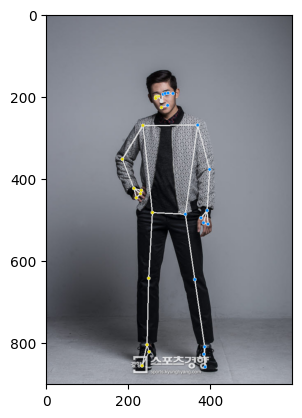

In [60]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

def get_detection(img_path):
    base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
    options = vision.PoseLandmarkerOptions(
        base_options=base_options,
        output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)
    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(img_path)
    # STEP 4: Detect pose landmarks from the input image.
    detection_result = detector.detect(image)
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    plt.imshow(annotated_image)
    plt.show()
    
    return detection_result.pose_landmarks, detection_result.segmentation_masks
r, s = get_detection('../target_img.jpg')

In [82]:
import numpy as np

def get_area(segmentation_masks, thr=0.5):
    return np.sqrt(np.sum(segmentation_masks.numpy_view() > thr))

def refine_landmarks(landmarks):
    lst = []
    for landmark in landmarks:
        lst.append([landmark.x, landmark.y, landmark.z, landmark.visibility])
    return np.array(lst)

I0000 00:00:1737017560.872854   36667 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737017560.922460   75525 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.0.9-0ubuntu0.3), renderer: D3D12 (Intel(R) Arc(TM) Graphics)
W0000 00:00:1737017561.128451   75528 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737017562.056923   75541 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


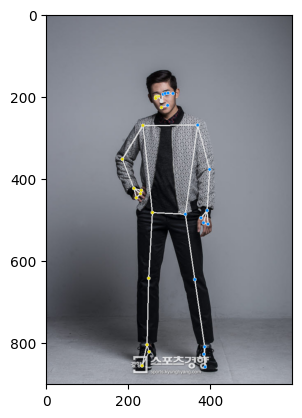

I0000 00:00:1737017562.408165   36667 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737017562.424260   75551 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.0.9-0ubuntu0.3), renderer: D3D12 (Intel(R) Arc(TM) Graphics)
W0000 00:00:1737017562.476815   75557 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737017562.747109   75566 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


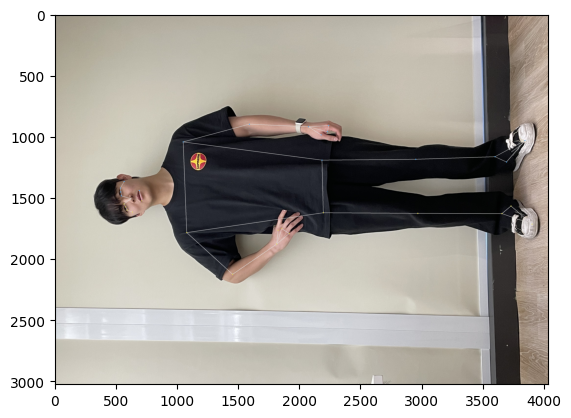

I0000 00:00:1737017564.412706   36667 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1737017564.427378   75577 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 24.0.9-0ubuntu0.3), renderer: D3D12 (Intel(R) Arc(TM) Graphics)
W0000 00:00:1737017564.693860   75584 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737017564.898803   75593 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


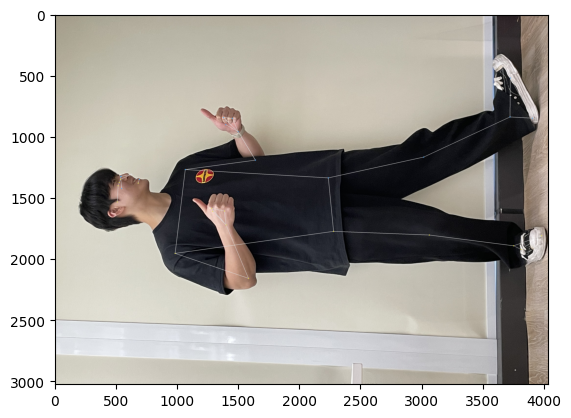

In [83]:
target_landmarks, target_masks = get_detection("../target_img.jpg")
target_landmarks_np = refine_landmarks(target_landmarks[0])
target_area = get_area(target_masks[0])

right_landmarks, right_masks = get_detection("../right_pose_img.jpg")
right_landmarks_np = refine_landmarks(right_landmarks[0])
right_area = get_area(right_masks[0])

wrong_landmarks, wrong_masks = get_detection("../wrong_pose_img.jpg")
wrong_landmarks_np = refine_landmarks(wrong_landmarks[0])
wrong_area = get_area(wrong_masks[0])

In [ ]:
def keypoint_similarity(gt_kpts, pred_kpts, sigmas, areas):
    # epsilon to take care of div by 0 exception.
    EPSILON = 1e-6
     
    # Eucleidian dist squared:
    # d^2 = (x1 - x2)^2 + (y1 - y2)^2
    # Shape: (M, N, #kpts) --> [M, N, 17]
    dist_sq = np.sum((gt_kpts - pred_kpts) ** 2)
 
    # Boolean ground-truth visibility mask for v_i > 0. Shape: [M, #kpts] --> [M, 17]
    vis_mask = gt_kpts.shape[0]
 
    # COCO assigns k = 2σ.
    k = 2*sigmas
 
    # Denominator in the exponent term. Shape: [M, 1, #kpts] --> [M, 1, 17]
    denom = 2 * (k**2) * (areas[:,None, None] + EPSILON)
 
    # Exponent term. Shape: [M, N, #kpts] --> [M, N, 17]
    exp_term = dist_sq / denom
 
    # Object Keypoint Similarity. Shape: (M, N)
    oks = (np.exp(-exp_term)).sum(-1) / (vis_mask + EPSILON)
 
    return oks